In [ ]:
item_menu = "arroz"

print (f"O cardápio hoje é {item_menu}")


In [ ]:
item = "arroz"
age = 15
actual_age = 15.5

type(age)

In [ ]:
club = input("type the club's name: ")
coach = input("type the coach's name")
city = input("type the city's name")

print(f"the {club} has {coach} as its coach and it is  located at the city of {city}")

In [ ]:
list = ['KDB', 'EHL', 'BSL']
list.append('FOLD')
list

In [ ]:
del(list)

In [ ]:
tupla = (1, 2, 3, 4, 5)
lista = list(tupla)
serie = list(range(200, 5000))

In [ ]:
phrase = "the manchester city club has been scouting new players around the globe, especially in south america region given the recent good players who came up from that"

In [ ]:
list_phrase = phrase.split(sep=' ')
print(list_phrase)

In [ ]:
clubs: list[str] = ['Manchester CIty', 'Liverpool', 'Barcelona', 'Chelsea', 'Arsenal', 'New Castle']
clubs_copy: list[str] = clubs.copy()
brazilian_clubs: list[str] = ['Flamengo', 'Grêmio', 'Palmeiras', 'Cruzeiro']

clubs.extend(brazilian_clubs)
print(clubs)

In [ ]:
other_clubs: list[str] = ['Bayern', 'Juventus', 'Real Madrid', 'São Paulo', 'Vitória', 'Santos']

clubs.extend(other_clubs)
print(clubs)



In [ ]:
upper_club = []
for club in clubs:
    club = club.upper()
    upper_club.append(club)
print(upper_club)


In [ ]:
upper_club = [club.upper() for club in clubs ]
print(upper_club)

In [ ]:
new_clubbs = ''.join([i if i.islower() else " " + i for i in clubs])[1:]
print(new_clubbs)

In [ ]:
clubs.reverse()


In [ ]:
club_dict = {
    'Arsenal': 'Havertz',
    'City': 'Debruine',
    'Chelsea': 'Thiago Silva',
    'Manchester U': 'Antony',
    'Barcelona': 'Pedri',
    'New Castle': 'Paqueta',
    'Real Madrid': 'Vini Junior',
    'Bayers': 'Kane',
    'Borusia': 'Reus',
    'PSG': 'Mbappe'
    }


In [ ]:
print(club_dict)

In [ ]:
club_dict = {key+' Footbal Club':value+' Player' for (key, value) in club_dict.items()}
print(club_dict)

In [ ]:
club_dict = {key:(value if value != 'Havertz Player' else 'Kai Havertz') for(key, value) in club_dict.items()}


In [ ]:
clubs = list(club_dict.keys())
players = list(club_dict.values())

In [ ]:
import random

In [ ]:

clubs_list = random.choices(clubs, k = 50)
pairs_clubs_players = [(club_dict[club], club) for club in clubs_list]
pairs_clubs_players

In [ ]:
club_dict['Arsenal']

In [ ]:
url = 'https://books.toscrape.com/catalogue/page-1.html'
from bs4 import BeautifulSoup
import requests
import re

In [ ]:
page = requests.get(url)

In [ ]:
page.status_code

In [ ]:
source = BeautifulSoup(page.content)

In [ ]:
books = source.select('h3 > a')


In [ ]:
list_book = []
for i in books:
    print('buscando livro {}'.format(i.attrs['href']))
    book = {}
    book_page = requests.get(f'https://books.toscrape.com/catalogue/{i.attrs["href"]}')
    source_page = BeautifulSoup(book_page.content)
    
    book['title'] = source_page.find('h1').text
    book['price'] = source_page.find('p', attrs={'class':'price_color'}).text
    book['stock'] = source_page.find('p', attrs={'class':'instock'}).text.split('(')[1].split(' ')[0]
    book['stars'] = source_page.find('p', attrs={'class': 'star-rating'}).attrs['class'][1]
    book['description'] = list(source_page.select('article > p'))[0].text.strip()
    book.update(dict(zip(list(map(lambda x: x.text, source_page.find_all('th'))), list(map(lambda x: x.text, source_page.find_all('td'))))))
    
    list_book.append(book)
    #print(book)
    
    print()
    
    

In [ ]:
import pandas as pd
pd.DataFrame(list_book)

In [ ]:
list_book = []
pg = 0
while True:
    pg += 1
    page = requests.get(f'https://books.toscrape.com/catalogue/page-{pg}.html')
    source_page = BeautifulSoup(book_page.content) 
    books = source.select('h3 > a')
    
    
    for i in books:
        print('PG: {} | buscando livro {}'.format(pg, i.attrs['href']))
        book = {}
        book_page = requests.get('https://books.toscrape.com/catalogue/'+i.attrs['href'])
        source_page = BeautifulSoup(book_page.content)
        
        book['title'] = source_page.find('h1').text
        book['price'] = source_page.find('p', attrs={'class':'price_color'}).text
        book['stock'] = source_page.find('p', attrs={'class':'instock'}).text.split('(')[1].split(' ')[0]
        book['stars'] = source_page.find('p', attrs={'class': 'star-rating'}).attrs['class'][1]
        desc = source_page.select('article > p')

        if desc:
            book['description'] = desc[0].text.strip()
        book.update(dict(zip(list(map(lambda x: x.text, source_page.find_all('th'))), list(map(lambda x: x.text, source_page.find_all('td'))))))
        
        list_book.append(book)

    if not source.find('a', string='next'):
        break

In [ ]:
import requests

url = "https://www.dafiti.com.br/calcados-masculinos/tenis/"

payload = {}
headers = {
  'authority': 'www.dafiti.com.br',
  'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
  'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
  'cache-control': 'max-age=0',
  'cookie': 'dftab-boletopdf=1; abTestSimilar=variante A; _dy_c_exps=; _dy_c_att_exps=; abProductCampaigns=1; dftab-debit3ds=1; _dycnst=dg; _dyid=-2580562335678812526; _dycst=dk.w.c.ws.; _gcl_au=1.1.1884286422.1701208755; Zanpid=; _tt_enable_cookie=1; _ttp=IDwqc9UaC3ExsTSNNckpj3EHU6Y; _pin_unauth=dWlkPU1qQmlOMlpqTTJVdE1qUXdPQzAwWkRsa0xUZzNZMkl0WlRkbFltSTBOalk1TTJZdw; cookieconsent_status=dismiss; _gcl_aw=GCL.1701256727.Cj0KCQiA35urBhDCARIsAOU7QwnUo96SNYhvvnK0bWxr_xY-zBRJJykLlA2vr2DMVkwhY_DCZsXxbhkaAv1kEALw_wcB; _gac_UA-86950572-1=1.1701256727.Cj0KCQiA35urBhDCARIsAOU7QwnUo96SNYhvvnK0bWxr_xY-zBRJJykLlA2vr2DMVkwhY_DCZsXxbhkaAv1kEALw_wcB; _gac_UA-20348534-21=1.1701256727.Cj0KCQiA35urBhDCARIsAOU7QwnUo96SNYhvvnK0bWxr_xY-zBRJJykLlA2vr2DMVkwhY_DCZsXxbhkaAv1kEALw_wcB; _hjSessionUser_1196013=eyJpZCI6IjczZWJlMWMyLTU4NzQtNTk0ZC1hZjEzLTk5Mjg5OTQ1NGUwOSIsImNyZWF0ZWQiOjE3MDEyMDg3NTU3NzgsImV4aXN0aW5nIjp0cnVlfQ==; _gac_UA-20348534-2=1.1701256731.Cj0KCQiA35urBhDCARIsAOU7QwnUo96SNYhvvnK0bWxr_xY-zBRJJykLlA2vr2DMVkwhY_DCZsXxbhkaAv1kEALw_wcB; DFTSID=e1dd5e882c8939bdb8641ab929731196; YII_CSRF_TOKEN=23a22c0553a5e704bf0b081d3d2418a0b057d9bc; ADS_UUID_FINGERPRINT=mRPGcaxDOJ01OyVWa%2Fej8UXE1wDHCE0ghpVpXCXAHEhLkYrMAVbukHTZPNe9F3cARH8b36zpJMFRenHhH3HjmYSsAs75pTh6811wpBFNy8JTrk1F9WMdM6K4gKtjxtohdeXrAB4hGFfOUnPaUG5uJzNYgwOWWLJoBKQEy0343iw%3D; _dy_csc_ses=t; x-config=false; showInterestFreeLabel=true; disable-boleto=false; __hl=6570686240c8a8335037daf4; utm_source=awin; utm_medium=af; utm_campaign=1437558; _gid=GA1.3.1015799447.1704547123; _dyjsession=6f9d70647c803a3d65a366856234dcc6; _dy_geo=BR.SA.BR_PA.BR_PA_Santar%C3%A9m; _dy_df_geo=Brazil..Santar%C3%A9m; _hjShownFeedbackMessage=true; dftab-boletopdf=1; seal_refresh=false; _fitAnalyticsABTestFunnel=fitanalytics_false; close-floater-baixe-app=1; tracking-data=; AwinChannelCookie=aw; _hjHasCachedUserAttributes=true; catalog-category-filter=%255B%255D; cart_count=0; cart_total=0; search=%5B%5D; _aw_j_17697={"id":"19abde54-d087-4aee-a375-37796a2d50b5-1","expiration":1712431816}; id-product=AD970SCM03VGI; _ga_B0521B3853=GS1.1.1704547162.4.1.1704548601.0.0.0; dy_fs_page=www.dafiti.com.br%2Ftenis-adidas-performance-pureboost-23-branco-13389734.html; _hjIncludedInSessionSample_1196013=0; _hjSession_1196013=eyJpZCI6IjExNTU1ODlhLWMxOGEtNDQxYy1hYmU5LTYzZmFiY2Q3MWRkNyIsImMiOjE3MDQ1NTE3MzcyOTksInMiOjAsInIiOjAsInNiIjowfQ==; _hjAbsoluteSessionInProgress=0; vip=yes; hostDomain=secure.dafiti.com.br; last-viewed=%5B%22AD970SCM65VHU%22%2C%22AD970SCM03VGI%22%2C%22AS296SCM99TIE%22%2C%22AS296SCM85TQK%22%5D; _dy_ses_load_seq=99395%3A1704551744894; _dy_soct=456415.821753.1696378515*365712.607483.1704547119*829988.1628234.1704547119*337486.546172.1704551744*394538.671875.1704551744*398246.681150.1704551744*834177.1644413.1704551744*856832.1733472.1704551744*860195.1744574.1704551744*114287.157919.1704551744*237122.354091.1704551744; mbox=check#true#1704551806|session#1704551736524-142957#1704553606; _dy_lu_ses=6f9d70647c803a3d65a366856234dcc6%3A1704551745508; _dy_toffset=0; _aw_m_17697=17697_1704547110_cfb3c6c0d94310ea512fb03fe33ab4c5; _derived_epik=dj0yJnU9VU9ZT0JkRFFObGhXWEZmc0RZck8tM0ZWMklnRl9xMW8mbj1VSTRxVjZPTWFHcDEwaE1vT09rNkhnJm09MSZ0PUFBQUFBR1daWlVFJnJtPTEmcnQ9QUFBQUFHV1paVUUmc3A9NQ; cto_bundle=PW9lSl82eXNGcFJSQXlnMXlIUUxWSWhnamlVV1huY3pRdVp0c0YlMkJma2F2NyUyQlNLSXdHdU5WWXNkNjZteGp2UE44Rm14OGJ5UGg5diUyRnhuQWJFSVJUTnNZR1BlSDhJbnhROVRDbnpPdzZ0czdDWk1namMlMkZ6TE1qMjlVRFpVRVVHVSUyRk4lMkIxTTFLTFAlMkZUM25Xc2lEaEsyQ1dYY1clMkZKRUlVRnVMZm8ybjF5a1RxbE1JaUNZM01yOTg4V0QzdnhuTFpjSEdBZHkzVEJNQnZiU2V5UlZCclVQeGlTZjAlMkJ3JTNEJTNE; _ga_6173967VRP=GS1.3.1704551737.6.1.1704551745.0.0.0; _uetsid=1e0c4fe0ac9611ee84b6ab80a20bfe6f; _uetvid=743502d024c611ee9f6e0355c6dee5c0; BackToShop__dafiti_com_br=https%3A%2F%2Fwww.dafiti.com.br%2Fcalcados-masculinos%2Ftenis%2F; _ga=GA1.3.256339213.1701208756; _ga_4X2HC5Z756=GS1.1.1704551738.6.1.1704551754.44.0.0',
  'referer': 'https://www.dafiti.com.br/Tenis-Adidas-Performance-Pureboost-23-Branco-13389734.html',
  'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"Windows"',
  'sec-fetch-dest': 'document',
  'sec-fetch-mode': 'navigate',
  'sec-fetch-site': 'same-origin',
  'sec-fetch-user': '?1',
  'upgrade-insecure-requests': '1',
  'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)


In [2]:
from bs4 import BeautifulSoup

In [3]:
soup = BeautifulSoup(response.content)

In [27]:

tenis = {}
tenis ['model'] = soup.find('p', attrs={'class':'product-box-title'})
tenis ['origin_price'] = soup.find('span', attrs={'class': 'product-box-price-from'})
tenis ['actuall_price'] = soup.find('span', attrs={'class': 'product-box-price-to'})
tenis ['brand'] = soup.select('div.product-box-brand > span')[0].text



In [28]:
tenis

{'model': <p class="product-box-title">Tênis Vans Doheny Marrom</p>,
 'origin_price': <span class="product-box-price-from">R$ 349,99</span>,
 'actuall_price': <span class="product-box-price-to">R$ 249,99</span>,
 'brand': 'Vans'}

In [1]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
with webdriver.Firefox() as driver:
    driver.get("https://mozilla.org")
profile = Options()
options = Options()
options.add_argument('-headless')
profile.set_preference('browser.download.folderlist', 2)
profile.set_preference('browser.download.dir', r'C:\Users\estev\OneDrive\Desktop\DISCIPLINA PYTHON GUSTAVO\SCRIPTS AULAS\PROJETOS-ESTEVAO')
profile.set_preference('general.useragent.override', 'Mozilla/5.0 (Linux; U; Android 4.0.3; en-us; KFTT Build/IML74K) AppleWebKit/537.36 (KHTML, like Gecko) Silk/3.68 like Chrome/39.0.2171.93 Safari/537.36')


In [9]:
driver = webdriver.Firefox(options=profile)
import time 

In [2]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [10]:
driver.get('https://www.amazon.com.br/')

In [3]:
def find_element(driver, xpath):
    element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, xpath))
    )
    return element

In [ ]:
from selenium.common.exceptions import TimeoutException

def find_element(driver, xpath):
    try:
        # Esperar por até 20 segundos até que o elemento seja visível
        element = WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.XPATH, xpath))
        )
        return element
    except TimeoutException as te:
        print(f'Tempo limite excedido ao tentar encontrar o elemento: {xpath}')
        raise te

# Usar a função find_element com WebDriverWait
search_input = find_element(driver, '/html/body/div[1]/div[1]/div[2]/div[2]/div/div[1]/div/div/div[2]/div/ul/li[2]/span/a/img')


In [44]:
from selenium.webdriver.support.expected_conditions import presence_of_element_located
with webdriver.Firefox() as driver:

    driver.get("https://www.amazon.com.br/")
    wait = WebDriverWait(driver, 10)
    driver.find_element(By.XPATH, "//*[@id='search']/div[1]/div[1]/div/span[1]/div[1]/div[3]/div").send_keys("livros" + Keys.RETURN)
with open('img.png', 'r'):
    img.write(driver.find_element(By.XPATH, "//*[@id='search']/div[1]/div[1]/div/span[1]/div[1]/div[3]/div"))



In [ ]:
with webdriver.Firefox() as driver:

    driver.get("https://www.amazon.com.br/")
    wait = WebDriverWait(driver, 10)
    driver.find_element(By.XPATH, "//*[@id='search']/div[1]/div[1]/div/span[1]/div[1]/div[3]/div").send_keys("amor" + Keys.RETURN)
    wait.until(presence_of_element_located((By.XPATH, '/html/body/div[1]/div[1]/div[1]/div[1]/div/span[1]/div[1]/div[2]/div/div/div/div/span/div/div/div[1]')))
    with open('img.png', 'wb') as img:
        img.write(driver.find_element(By.XPATH, "/html/body/div[1]/div[1]/div[1]/div[1]/div/span[1]/div[1]/div[2]/div/div/div/div/span/div/div/div[1]").screenshot_as_png)

In [58]:
with webdriver.Firefox() as driver:
    driver.get("https://www.amazon.com.br/")
    
    
    search_input = driver.find_element(By.XPATH, "//*[@id='twotabsearchtextbox']")
    wait = WebDriverWait(driver, 10)
    search_input.send_keys("livros" + Keys.RETURN)


    wait = WebDriverWait(driver, 10)
    wait.until(presence_of_element_located((By.XPATH, '/html/body/div[1]/div[1]/div[1]/div[1]/div/span[1]/div[1]/div[3]/div/div/div/div/span/div/div/div[1]')))
    
   
    target_element = driver.find_element(By.XPATH, "/html/body/div[1]/div[1]/div[1]/div[1]/div/span[1]/div[1]/div[3]/div/div/div/div/span/div/div/div[1]")
    
 
    screenshot = target_element.screenshot_as_png
    with open('img.png', 'wb') as img:
        img.write(screenshot)


In [31]:
from selenium.common.exceptions import TimeoutException
def find_elements(driver, xpath):
    elements = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.XPATH, xpath))
    )
    return elements

search_input = find_elements(driver, "//*[@id='twotabsearchtextbox']")
for element in search_input:
    search_input[0].clear()
    search_input[0].send_keys('livros')
    search_input[0].send_keys(Keys.ENTER) 

In [32]:
book_list = list(map(lambda x: x.get_attribute('href'), find_elements(driver, '//div[@class="a-section a-spacing-base"]/div[1]/span/a[@class="a-link-normal s-no-outline"]')))


In [34]:
def wait_element_load(driver, xpath, time):
    try:
        element = WebDriverWait(driver, time).until(
            EC.presence_of_all_elements_located(By.XPATH,xpath)
        )
    except:
        print("element didn't load")

In [35]:
home = driver.current_window_handle
new_tab = driver.window_handles[1]
driver.current_url
driver.switch_to.window(new_tab)

In [ ]:
all_books = []
pg = 0

while True:
    pg +=1
    driver.switch_to.window(home)
    time.sleep(1)

    book_list = list(map(lambda x: x.get_attribute('href'), find_elements(driver, '//div[@class="a-section a-spacing-base"]/div[1]/span/a[@class="a-link-normal s-no-outline"]')))
    find_elements("//a[@class = 's-pagination-item s-pagination-next s-pagination-button s-pagination-separator']")
    driver.switch_to.window(new_tab)
    book_c = 0
    for i in book_list:
        book_c += 1
        actual_book = {}
        driver.get(i)
        wait_element_load(driver, "//h1[@id = 'title']", 3)
        actual_book['book_title'] = find_elements(driver, "//h1[@id = 'title']").text
        break

        



In [40]:
find_elements(driver, "//a[@class = 's-pagination-item s-pagination-next s-pagination-button s-pagination-separator']")

TimeoutException: Message: 


In [29]:
import basedosdados as bd


In [ ]:
query = '''
SELECT sigla_uf * 
FROM basedosdados.br_anp_precos_combustiveis.microdados 
WHERE sigla_uf = 'PA'
'''
df = bd.read_sql(query,
billing_project_id="estevaomcsproject")

In [1]:
def nums (num):

    print (num)
    if num % 2 != 0:
        print('please enter an even number')

    elif num == 2:
        return num
    else:
        return nums(num-2)

In [19]:
def Fibonacci(idx):
    if idx <= 1:
        return idx
    else:
        return Fibonacci(idx-1)+Fibonacci(idx-2)


In [21]:
def fibonacci (idx):
    seq = [0, 1]
    for i in range(idx):
        seq.append(seq[-1]+seq[-2])
    return seq[-2]
    



In [27]:
import pandas as pd

In [36]:
Clubs = {'Clubs': ['BArcelona',  'Real Madrid', 'Bayern', 'Manchenster CIty', 'Liverpool'],
         'Players': ['Pedri', 'Vini Junior', 'Kimichi', 'Rodri', 'Salah'],
         'Trophies':[5, 6, 7, 9, 0]}

 


pd.DataFrame(Clubs)

,Clubs,Players,Trophies
0,BArcelona,Pedri,5
1,Real Madrid,Vini Junior,6
2,Bayern,Kimichi,7
3,Manchenster CIty,Rodri,9
4,Liverpool,Salah,0


In [50]:
a = [1, 2, 3, 4, 5]
b = ['Pimeiro', 'Segundo', 'Terceiro', 'Quarto', 'Quinto']
c = ['FIrst', 'Second', 'Third', 'Fourth', 'Fifth']

pos = list(zip(a, b, c))



In [51]:
pos

[(1, 'Pimeiro', 'FIrst'),
 (2, 'Segundo', 'Second'),
 (3, 'Terceiro', 'Third'),
 (4, 'Quarto', 'Fourth'),
 (5, 'Quinto', 'Fifth')]

In [4]:
clubs = [
    {'clubs': 'Real Madrid', 'trophies': 10, 'stadium_grass': ['fake', 'real'], 'locate': 'Spain'},
    {'clubs': 'Barcelona', 'trophies': 9, 'stadium_grass': ['real'], 'locate':'Spain'},
    {'clubs': 'Bayern Munich', 'trophies': 10, 'stadium_grass': ['fake'], 'locate':'Germany'},
    {'clubs': 'Manchester United', 'trophies': 20, 'stadium_grass': ['fake', 'real'], 'locate':'England'},
    {'clubs': 'Liverpool', 'trophies': 2, 'stadium_grass': ['real'], 'locate':'England'},
    {'clubs': 'Chelsea', 'trophies': 3, 'stadium_grass': ['fake'], 'locate':'England'},
    {'clubs': 'Manchester City', 'trophies': 5, 'stadium_grass': ['fake', 'real'], 'locate':'England'},
    {'clubs': 'Arsenal', 'trophies': 39, 'stadium_grass': ['fake', 'real'], 'locate':'England'},
    {'clubs': 'Tottenham Hotspur', 'trophies': 90, 'stadium_grass': ['real'], 'locate':'England'},
    {'clubs': 'Juventus', 'trophies': 5, 'stadium_grass': ['fake', 'real'], 'locate':'Italy'},
    {'clubs': 'Atlético Madrid', 'trophies': 34, 'stadium_grass': ['fake'], 'locate':'Spain'},
    {'clubs': 'Inter Milan', 'trophies': 19, 'stadium_grass': ['fake', 'real'], 'locate':'Italy'},
    {'clubs': 'Roma', 'trophies': 22, 'stadium_grass': ['fake'], 'locate':'Italy'},
    {'clubs': 'Napoli', 'trophies': 2, 'stadium_grass': ['real'], 'locate':'Italy'},
    {'clubs': 'AC Milan', 'trophies': 69, 'stadium_grass': ['fake', 'real'], 'locate':'Italy'},
    {'clubs': 'Lazio', 'trophies': 18, 'stadium_grass': ['fake', 'real'], 'locate':'Italy'},
    {'clubs': 'Fiorentina', 'trophies': 30, 'stadium_grass': ['fake', 'real'], 'locate':'Italy'},
    {'clubs': 'Atalanta', 'trophies': 3, 'stadium_grass': ['real'], 'locate':'Italy'},
    {'clubs': 'Bayer Leverkusen', 'trophies': 10, 'stadium_grass': ['real'], 'locate':'Germany'},
    {'clubs': 'Borussia Dortmund', 'trophies': 29, 'stadium_grass': ['fake', 'real'], 'locate':'Germany'}
]



In [99]:
clubs_filter = list(map(lambda c: c['clubs'], filter(lambda c: c['locate'] == 'England', clubs)))
clubs_filter

['Manchester United',
 'Liverpool',
 'Chelsea',
 'Manchester City',
 'Arsenal',
 'Tottenham Hotspur']

In [ ]:
for index, club in enumerate(clubs):
    print(index, club['clubs'])

In [57]:
class olx:
    def __init__(self):
        pass
    def golaço(self, gol):
        if gol >= 20:
            print('golaço do caralho')
        else:
            print('gol normal')
        
    def player(self, n_gols):

        if n_gols <= 10:
            print('nada demais, só obrigação')
        else:
            print(f'artilheiro foda p krl marcou {n_gols} gols')

In [58]:
var = olx()


In [70]:
from multiprocessing.pool import ThreadPool as Pool
import multiprocessing
import threading

In [1]:
import multiprocessing
from multiprocessing import Process, Queue

class Players(process


[None, None]

In [ ]:
num_robot = 4
pool = Pool(num_robot)
threads = []

for i in range(1,40):
    threads.append(pool.apply_async(multi, (i,)))
for result in threads:
    result.get()
pool.close()

In [88]:
from bs4 import BeautifulSoup
import requests 
import pandas as pd

In [1]:
from threading import Thread
from os import getpid, getppid

def 

In [31]:
class PLAYER:
    def __init__(self):
        self.all_players = []

    
    def add_player (self, name, goals):
        player = {'Player': name, 'Number of goals': goals}
        self.all_players.append(player) 

    def info_players (self, name):
            found_player = next((player for player in self.all_players if player['Player']==name), None)
            
            if found_player:
                goals = found_player['Number of goals']
                 
                if 0 <= goals <10 :
                    print (f"{name}, is a very fucked up player, he didn't score one sigle goal in Premier League")
                
                elif 10< goals <= 1000:
                    print(f"{name} is a average player in Premier League")
            else:
                print(f'The player {name} is not on hte list')
    
    def show_players (self):
        
        return self.all_players



        
        

In [33]:
team = PLAYER()
#team.add_player('Ronaldo', 50 )
team.add_player('Messi', 4)



In [35]:
team.show_players()

[{'Player': 'Messi', 'Number of goals': 4}]

In [6]:
from multiprocessing import Process, Queue, Pool

def f(x):
    return x*x


if __name__=='__main__':
    with Pool(processes=2) as pool:
        print(pool.map(f, range(3)))
    

In [19]:
teams = [
    {'clubs': 'Real Madrid', 'trophies': 10, 'stadium_grass': 'fake', 'locate': 'Spain', 'city': 'Madrid', 'foundation_date': '1902-03-06'},
    {'clubs': 'Barcelona', 'trophies': 9, 'stadium_grass': 'real', 'locate':'Spain', 'city': 'Barcelona', 'foundation_date': '1899-11-29'},
    {'clubs': 'Bayern Munich', 'trophies': 10, 'stadium_grass': 'fake', 'locate':'Germany', 'city': 'Munich', 'foundation_date': '1900-02-27'},
    {'clubs': 'Manchester United', 'trophies': 20, 'stadium_grass': 'real', 'locate':'England', 'city': 'Manchester', 'foundation_date': '1878-04-01'},
    {'clubs': 'Liverpool', 'trophies': 2, 'stadium_grass': 'real', 'locate':'England', 'city': 'Liverpool', 'foundation_date': '1892-06-03'},
    {'clubs': 'Chelsea', 'trophies': 3, 'stadium_grass': 'fake', 'locate':'England', 'city': 'London', 'foundation_date': '1905-03-10'},
    {'clubs': 'Manchester City', 'trophies': 5, 'stadium_grass': 'real', 'locate':'England', 'city': 'Manchester', 'foundation_date': '1880-04-01'},
    {'clubs': 'Arsenal', 'trophies': 39, 'stadium_grass': 'fake', 'locate':'England', 'city': 'London', 'foundation_date': '1886-10-01'},
    {'clubs': 'Tottenham Hotspur', 'trophies': 90, 'stadium_grass': 'real', 'locate':'England', 'city': 'London', 'foundation_date': '1882-09-05'},
    {'clubs': 'Juventus', 'trophies': 5, 'stadium_grass': 'fake', 'locate':'Italy', 'city': 'Turin', 'foundation_date': '1897-11-01'},
    {'clubs': 'Atlético Madrid', 'trophies': 34, 'stadium_grass': 'fake', 'locate':'Spain', 'city': 'Madrid', 'foundation_date': '1903-04-26'},
    {'clubs': 'Inter Milan', 'trophies': 19, 'stadium_grass': 'fake', 'locate':'Italy', 'city': 'Milan', 'foundation_date': '1908-03-09'},
    {'clubs': 'Roma', 'trophies': 22, 'stadium_grass': 'fake', 'locate':'Italy', 'city': 'Rome', 'foundation_date': '1927-07-07'},
    {'clubs': 'Napoli', 'trophies': 2, 'stadium_grass': 'real', 'locate':'Italy', 'city': 'Naples', 'foundation_date': '1926-08-25'},
    {'clubs': 'AC Milan', 'trophies': 69, 'stadium_grass': 'fake', 'locate':'Italy', 'city': 'Milan', 'foundation_date': '1899-12-16'},
    {'clubs': 'Lazio', 'trophies': 18, 'stadium_grass': 'fake', 'locate':'Italy', 'city': 'Rome', 'foundation_date': '1900-01-09'},
    {'clubs': 'Fiorentina', 'trophies': 30, 'stadium_grass': 'fake', 'locate':'Italy', 'city': 'Florence', 'foundation_date': '1926-08-29'},
    {'clubs': 'Atalanta', 'trophies': 3, 'stadium_grass': 'real', 'locate':'Italy', 'city': 'Bergamo', 'foundation_date': '1907-10-17'},
    {'clubs': 'Bayer Leverkusen', 'trophies': 10, 'stadium_grass': 'real', 'locate':'Germany', 'city': 'Leverkusen', 'foundation_date': '1904-07-01'},
    {'clubs': 'Borussia Dortmund', 'trophies': 29, 'stadium_grass': 'fake', 'locate':'Germany', 'city': 'Dortmund', 'foundation_date': '1909-12-19'},
    {'clubs': 'Paris Saint-Germain', 'trophies': 30, 'stadium_grass': 'real', 'locate':'France', 'city': 'Paris', 'foundation_date': '1970-08-12'},
    {'clubs': 'Ajax', 'trophies': 25, 'stadium_grass': 'real', 'locate':'Netherlands', 'city': 'Amsterdam', 'foundation_date': '1900-03-18'},
    {'clubs': 'Benfica', 'trophies': 37, 'stadium_grass': 'real', 'locate':'Portugal', 'city': 'Lisbon', 'foundation_date': '1904-02-28'},
    {'clubs': 'Porto', 'trophies': 28, 'stadium_grass': 'real', 'locate':'Portugal', 'city': 'Porto', 'foundation_date': '1893-12-28'},
    {'clubs': 'Anderlecht', 'trophies': 34, 'stadium_grass': 'real', 'locate':'Belgium', 'city': 'Brussels', 'foundation_date': '1908-05-27'},
    {'clubs': 'Celtic', 'trophies': 51, 'stadium_grass': 'real', 'locate':'Scotland', 'city': 'Glasgow', 'foundation_date': '1887-11-06'},
    {'clubs': 'Feyenoord', 'trophies': 15, 'stadium_grass': 'real', 'locate':'Netherlands', 'city': 'Rotterdam', 'foundation_date': '1908-07-19'},
    {'clubs': 'Sevilla', 'trophies': 9, 'stadium_grass': 'real', 'locate':'Spain', 'city': 'Seville', 'foundation_date': '1890-01-25'},
    {'clubs': 'Shakhtar Donetsk', 'trophies': 15, 'stadium_grass': 'real', 'locate':'Ukraine', 'city': 'Donetsk', 'foundation_date': '1936-05-24'},
    {'clubs': 'Lyon', 'trophies': 13, 'stadium_grass': 'real', 'locate':'France', 'city': 'Lyon', 'foundation_date': '1950-08-03'},
    {'clubs': 'Monaco', 'trophies': 8, 'stadium_grass': 'real', 'locate':'France', 'city': 'Monaco', 'foundation_date': '1924-08-01'},
    {'clubs': 'Dynamo Kyiv', 'trophies': 28, 'stadium_grass': 'real', 'locate':'Ukraine', 'city': 'Kyiv', 'foundation_date': '1927-05-13'},
    {'clubs': 'Copenhagen', 'trophies': 17, 'stadium_grass': 'real', 'locate':'Denmark', 'city': 'Copenhagen', 'foundation_date': '1992-07-01'},
    {'clubs': 'Red Bull Salzburg', 'trophies': 14, 'stadium_grass':'real', 'locate':'Austria', 'city': 'Salzburg', 'foundation_date': '1933-09-13'},
    {'clubs': 'Galatasaray', 'trophies': 22, 'stadium_grass': 'real', 'locate':'Turkey', 'city': 'Istanbul', 'foundation_date': '1905-10-01'},
    {'clubs': 'Fenerbahçe', 'trophies': 28, 'stadium_grass': 'real', 'locate':'Turkey', 'city': 'Istanbul', 'foundation_date': '1907-05-03'},
    {'clubs': 'Besiktas', 'trophies': 16, 'stadium_grass': 'real', 'locate':'Turkey', 'city': 'Istanbul', 'foundation_date': '1903-03-19'},
    {'clubs': 'RB Leipzig', 'trophies': 2, 'stadium_grass': 'real', 'locate':'Germany', 'city': 'Leipzig', 'foundation_date': '2009-05-19'},
    {'clubs': 'Wolfsburg', 'trophies': 2, 'stadium_grass': 'real', 'locate':'Germany', 'city': 'Wolfsburg', 'foundation_date': '1945-09-12'},
    {'clubs': 'Boca Juniors', 'trophies': 71, 'stadium_grass': 'real', 'locate':'Argentina', 'city': 'Buenos Aires', 'foundation_date': '1930-09-12'}
]


In [18]:
add = []

In [46]:
clubs

[{'clubs': 'Real Madrid',
  'trophies': 10,
  'stadium_grass': ['fake', 'real'],
  'locate': 'Spain',
  'city': 'Madrid',
  'foundation_date': '1902-03-06'},
 {'clubs': 'Barcelona',
  'trophies': 9,
  'stadium_grass': ['real'],
  'locate': 'Spain',
  'city': 'Barcelona',
  'foundation_date': '1899-11-29'},
 {'clubs': 'Bayern Munich',
  'trophies': 10,
  'stadium_grass': ['fake'],
  'locate': 'Germany',
  'city': 'Munich',
  'foundation_date': '1900-02-27'},
 {'clubs': 'Manchester United',
  'trophies': 20,
  'stadium_grass': ['fake', 'real'],
  'locate': 'England',
  'city': 'Manchester',
  'foundation_date': '1878-04-01'},
 {'clubs': 'Liverpool',
  'trophies': 2,
  'stadium_grass': ['real'],
  'locate': 'England',
  'city': 'Liverpool',
  'foundation_date': '1892-06-03'},
 {'clubs': 'Chelsea',
  'trophies': 3,
  'stadium_grass': ['fake'],
  'locate': 'England',
  'city': 'London',
  'foundation_date': '1905-03-10'},
 {'clubs': 'Manchester City',
  'trophies': 5,
  'stadium_grass': ['f

In [47]:
import pandas as pd
df = pd.DataFrame(clubs)


In [48]:
df

,clubs,trophies,stadium_grass,locate,city,foundation_date
0,Real Madrid,10,"[fake, real]",Spain,Madrid,1902-03-06
1,Barcelona,9,[real],Spain,Barcelona,1899-11-29
2,Bayern Munich,10,[fake],Germany,Munich,1900-02-27
3,Manchester United,20,"[fake, real]",England,Manchester,1878-04-01
4,Liverpool,2,[real],England,Liverpool,1892-06-03
5,Chelsea,3,[fake],England,London,1905-03-10
6,Manchester City,5,"[fake, real]",England,Manchester,1880-04-01
7,Arsenal,39,"[fake, real]",England,London,1886-10-01
8,Tottenham Hotspur,90,[real],England,London,1882-09-05
9,Juventus,5,"[fake, real]",Italy,Turin,1897-11-01


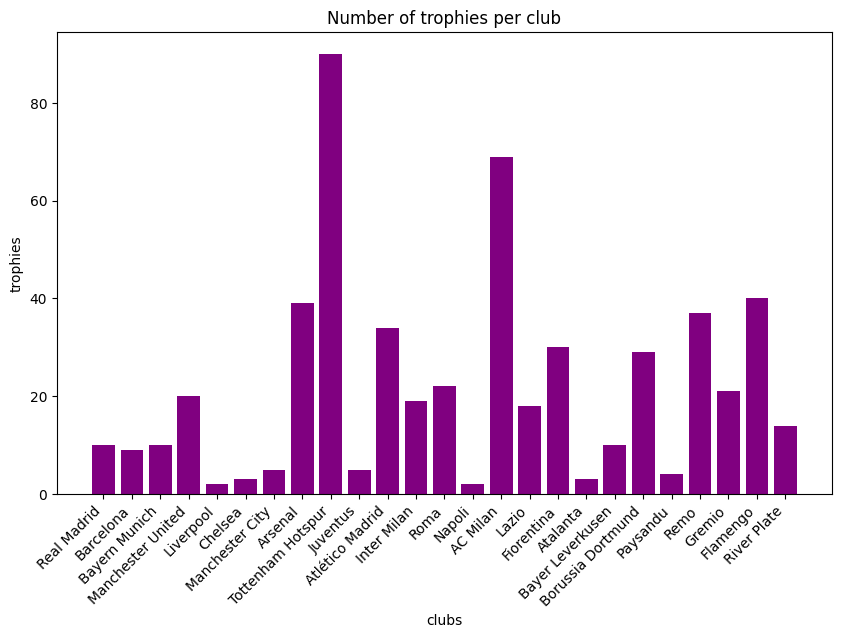

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(df['clubs'], df['trophies'], color='purple')
plt.xlabel('clubs')
plt.ylabel('trophies')
plt.title('Number of trophies per club')
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
import sqlite3 as sq
db_path = r'C:\Users\estev\OneDrive\Desktop\projetos-estevao\STUDYING\football.db'
conn = sq.connect(db_path)
cursor = conn.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS teams (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        clubs TEXT,
        trophies INTEGER,
        stadium_grass TEXT,
        locate TEXT,
        city TEXT,
        foundation_date TEXT
    )''')

for team in teams:
    cursor.execute('''
        INSERT INTO teams (clubs, trophies, stadium_grass, locate, city, foundation_date)
        VALUES(?,?,?,?,?,?)
    ''', (teams["clubs"], teams["trophies"], teams["stadium_grass"], teams["locate"], teams.get("city", ''), teams.get("foundation_date", '')))


conn.commit()
conn.close


TypeError: list indices must be integers or slices, not str

In [32]:
teams = [
    {'clubs': 'Real Madrid', 'trophies': 10, 'stadium_grass':'fake', 'locate': 'Spain', 'city': 'Madrid', 'foundation_date': '1902-03-06'},
    {'clubs': 'Barcelona', 'trophies': 9, 'stadium_grass': 'real', 'locate':'Spain', 'city': 'Barcelona', 'foundation_date': '1899-11-29'},
    {'clubs': 'Bayern Munich', 'trophies': 10, 'stadium_grass': 'fake', 'locate':'Germany', 'city': 'Munich', 'foundation_date': '1900-02-27'},
    {'clubs': 'Manchester United', 'trophies': 20, 'stadium_grass': 'real', 'locate':'England', 'city': 'Manchester', 'foundation_date': '1878-04-01'},
    {'clubs': 'Liverpool', 'trophies': 2, 'stadium_grass': 'real', 'locate':'England', 'city': 'Liverpool', 'foundation_date': '1892-06-03'},
    {'clubs': 'Chelsea', 'trophies': 3, 'stadium_grass': 'fake', 'locate':'England', 'city': 'London', 'foundation_date': '1905-03-10'},
    {'clubs': 'Manchester City', 'trophies': 5, 'stadium_grass': 'real', 'locate':'England', 'city': 'Manchester', 'foundation_date': '1880-04-01'},
    {'clubs': 'Arsenal', 'trophies': 39, 'stadium_grass': 'fake', 'locate':'England', 'city': 'London', 'foundation_date': '1886-10-01'},
    {'clubs': 'Tottenham Hotspur', 'trophies': 90, 'stadium_grass': 'real', 'locate':'England', 'city': 'London', 'foundation_date': '1882-09-05'},
    {'clubs': 'Juventus', 'trophies': 5, 'stadium_grass': 'fake', 'locate':'Italy', 'city': 'Turin', 'foundation_date': '1897-11-01'},
    {'clubs': 'Atlético Madrid', 'trophies': 34, 'stadium_grass': 'fake', 'locate':'Spain', 'city': 'Madrid', 'foundation_date': '1903-04-26'},
    {'clubs': 'Inter Milan', 'trophies': 19, 'stadium_grass': 'fake', 'locate':'Italy', 'city': 'Milan', 'foundation_date': '1908-03-09'},
    {'clubs': 'Roma', 'trophies': 22, 'stadium_grass': 'fake', 'locate':'Italy', 'city': 'Rome', 'foundation_date': '1927-07-07'},
    {'clubs': 'Napoli', 'trophies': 2, 'stadium_grass': 'real', 'locate':'Italy', 'city': 'Naples', 'foundation_date': '1926-08-25'},
    {'clubs': 'AC Milan', 'trophies': 69, 'stadium_grass': 'fake', 'locate':'Italy', 'city': 'Milan', 'foundation_date': '1899-12-16'},
    {'clubs': 'Lazio', 'trophies': 18, 'stadium_grass': 'fake', 'locate':'Italy', 'city': 'Rome', 'foundation_date': '1900-01-09'},
    {'clubs': 'Fiorentina', 'trophies': 30, 'stadium_grass': 'fake', 'locate':'Italy', 'city': 'Florence', 'foundation_date': '1926-08-29'},
    {'clubs': 'Atalanta', 'trophies': 3, 'stadium_grass': 'real', 'locate':'Italy', 'city': 'Bergamo', 'foundation_date': '1907-10-17'},
    {'clubs': 'Bayer Leverkusen', 'trophies': 10, 'stadium_grass': 'real', 'locate':'Germany', 'city': 'Leverkusen', 'foundation_date': '1904-07-01'},
    {'clubs': 'Borussia Dortmund', 'trophies': 29, 'stadium_grass': 'fake', 'locate':'Germany', 'city': 'Dortmund', 'foundation_date': '1909-12-19'},
    {'clubs': 'Paris Saint-Germain', 'trophies': 30, 'stadium_grass': 'real', 'locate':'France', 'city': 'Paris', 'foundation_date': '1970-08-12'},
    {'clubs': 'Ajax', 'trophies': 25, 'stadium_grass': 'real', 'locate':'Netherlands', 'city': 'Amsterdam', 'foundation_date': '1900-03-18'},
    {'clubs': 'Benfica', 'trophies': 37, 'stadium_grass': 'real', 'locate':'Portugal', 'city': 'Lisbon', 'foundation_date': '1904-02-28'},
    {'clubs': 'Porto', 'trophies': 28, 'stadium_grass': 'real', 'locate':'Portugal', 'city': 'Porto', 'foundation_date': '1893-12-28'},
    {'clubs': 'Anderlecht', 'trophies': 34, 'stadium_grass': 'real', 'locate':'Belgium', 'city': 'Brussels', 'foundation_date': '1908-05-27'},
    {'clubs': 'Celtic', 'trophies': 51, 'stadium_grass': 'real', 'locate':'Scotland', 'city': 'Glasgow', 'foundation_date': '1887-11-06'},
    {'clubs': 'Feyenoord', 'trophies': 15, 'stadium_grass': 'real', 'locate':'Netherlands', 'city': 'Rotterdam', 'foundation_date': '1908-07-19'},
    {'clubs': 'Sevilla', 'trophies': 9, 'stadium_grass': 'real', 'locate':'Spain', 'city': 'Seville', 'foundation_date': '1890-01-25'},
    {'clubs': 'Shakhtar Donetsk', 'trophies': 15, 'stadium_grass': 'real', 'locate':'Ukraine', 'city': 'Donetsk', 'foundation_date': '1936-05-24'},
    {'clubs': 'Lyon', 'trophies': 13, 'stadium_grass': 'real', 'locate':'France', 'city': 'Lyon', 'foundation_date': '1950-08-03'},
    {'clubs': 'Monaco', 'trophies': 8, 'stadium_grass': 'real', 'locate':'France', 'city': 'Monaco', 'foundation_date': '1924-08-01'},
    {'clubs': 'Dynamo Kyiv', 'trophies': 28, 'stadium_grass': 'real', 'locate':'Ukraine', 'city': 'Kyiv', 'foundation_date': '1927-05-13'},
    {'clubs': 'Copenhagen', 'trophies': 17, 'stadium_grass': 'real', 'locate':'Denmark', 'city': 'Copenhagen', 'foundation_date': '1992-07-01'},
    {'clubs': 'Red Bull Salzburg', 'trophies': 14, 'stadium_grass':'real', 'locate':'Austria', 'city': 'Salzburg', 'foundation_date': '1933-09-13'},
    {'clubs': 'Galatasaray', 'trophies': 22, 'stadium_grass': 'real', 'locate':'Turkey', 'city': 'Istanbul', 'foundation_date': '1905-10-01'},
    {'clubs': 'Fenerbahçe', 'trophies': 28, 'stadium_grass': 'real', 'locate':'Turkey', 'city': 'Istanbul', 'foundation_date': '1907-05-03'},
    {'clubs': 'Besiktas', 'trophies': 16, 'stadium_grass': 'real', 'locate':'Turkey', 'city': 'Istanbul', 'foundation_date': '1903-03-19'},
    {'clubs': 'RB Leipzig', 'trophies': 2, 'stadium_grass': 'real', 'locate':'Germany', 'city': 'Leipzig', 'foundation_date': '2009-05-19'},
    {'clubs': 'Wolfsburg', 'trophies': 2, 'stadium_grass': 'real', 'locate':'Germany', 'city': 'Wolfsburg', 'foundation_date': '1945-09-12'},
    {'clubs': 'Boca Juniors', 'trophies': 71, 'stadium_grass': 'real', 'locate':'Argentina', 'city': 'Buenos Aires', 'foundation_date': '1930-09-12'}
]


In [36]:
from sqlalchemy import create_engine
import pandas as pd
import psycopg2
from psycopg2.extras import execute_values

# Definindo a tabela no banco de dados
conn = psycopg2.connect(host="localhost", dbname="postgres", user="postgres", password="132435", port=1998)
cursor = conn.cursor()
cursor.execute('''
    CREATE TABLE IF NOT EXISTS teams(
        id SERIAL,
        clubs TEXT,
        trophies INTEGER,
        stadium_grass TEXT,
        locate TEXT,
        city TEXT, 
        foundation_date TEXT
    );
''')

conn = psycopg2.connect(host="localhost", dbname="postgres", user="postgres", password="132435", port=1998)
cursor = conn.cursor()


insert_data = [(team["clubs"], team["trophies"], team["stadium_grass"].lower(), team["locate"], team.get("city", ''), team.get("foundation_date", '')) for team in teams]


execute_values(cursor, '''INSERT INTO teams (clubs, trophies, stadium_grass, locate, city, foundation_date) VALUES %s''', insert_data)

conn.commit()
conn.close()


InvalidTextRepresentation: ERRO:  matriz mal formada: "fake"
LINE 1: ..., city, foundation_date) VALUES ('Real Madrid',10,'fake','Sp...
                                                             ^
DETAIL:  Valor da matriz deve iniciar com "{" ou dimensão.


In [42]:
data = [(team["clubs"], team["trophies"]) for team in teams]
data

[('Real Madrid', 10),
 ('Barcelona', 9),
 ('Bayern Munich', 10),
 ('Manchester United', 20),
 ('Liverpool', 2),
 ('Chelsea', 3),
 ('Manchester City', 5),
 ('Arsenal', 39),
 ('Tottenham Hotspur', 90),
 ('Juventus', 5),
 ('Atlético Madrid', 34),
 ('Inter Milan', 19),
 ('Roma', 22),
 ('Napoli', 2),
 ('AC Milan', 69),
 ('Lazio', 18),
 ('Fiorentina', 30),
 ('Atalanta', 3),
 ('Bayer Leverkusen', 10),
 ('Borussia Dortmund', 29),
 ('Paris Saint-Germain', 30),
 ('Ajax', 25),
 ('Benfica', 37),
 ('Porto', 28),
 ('Anderlecht', 34),
 ('Celtic', 51),
 ('Feyenoord', 15),
 ('Sevilla', 9),
 ('Shakhtar Donetsk', 15),
 ('Lyon', 13),
 ('Monaco', 8),
 ('Dynamo Kyiv', 28),
 ('Copenhagen', 17),
 ('Red Bull Salzburg', 14),
 ('Galatasaray', 22),
 ('Fenerbahçe', 28),
 ('Besiktas', 16),
 ('RB Leipzig', 2),
 ('Wolfsburg', 2),
 ('Boca Juniors', 71)]